In [40]:
!bash push.sh

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Operation not permitted
zsh: can't open input file: push.sh


In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
eng_train = pd.read_csv('trac2_eng_train.csv')
eng_train.sample(5)

,ID,Text,Sub-task A,Sub-task B
872,C68.56.4,Of course why not,NAG,NGEN
1113,C4.1995,Best line of this video is\n[4:20](https://www...,NAG,NGEN
237,C7.1224,Bhai good analysis,NAG,NGEN
4062,C33.497,Fuck off... Don't u day dare spread homophobia...,OAG,GEN
2426,C7.927,Next role of preeti Is for pratik..,NAG,NGEN


In [22]:
eng_train.info() # no null enteries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4263 entries, 0 to 4262
Data columns (total 4 columns):
ID            4263 non-null object
Text          4263 non-null object
Sub-task A    4263 non-null object
Sub-task B    4263 non-null object
dtypes: object(4)
memory usage: 133.3+ KB


In [13]:
eng_train.iloc[28].Text, eng_train.iloc[28]['Sub-task A'] 

('feminism means equality not discrimination first you should learn about this\ngo and study about feminism.',
 'OAG')

In [24]:
eng_train[eng_train['Sub-task A'] == 'NAG'].sample(5)

,ID,Text,Sub-task A,Sub-task B
2082,C10.227,This woman is terror for any country 🤔 she don...,NAG,NGEN
1805,C33.778.2,@b bro I agree with u bro👍,NAG,NGEN
3924,C7.763,Cultural values are subjective... liberty stan...,NAG,NGEN
2170,C26.208,salute for him,NAG,NGEN
4243,C10.459,"Absolutely, how the hell can she do this here ...",NAG,NGEN


NAG    3375
CAG     453
OAG     435
Name: Sub-task A, dtype: int64

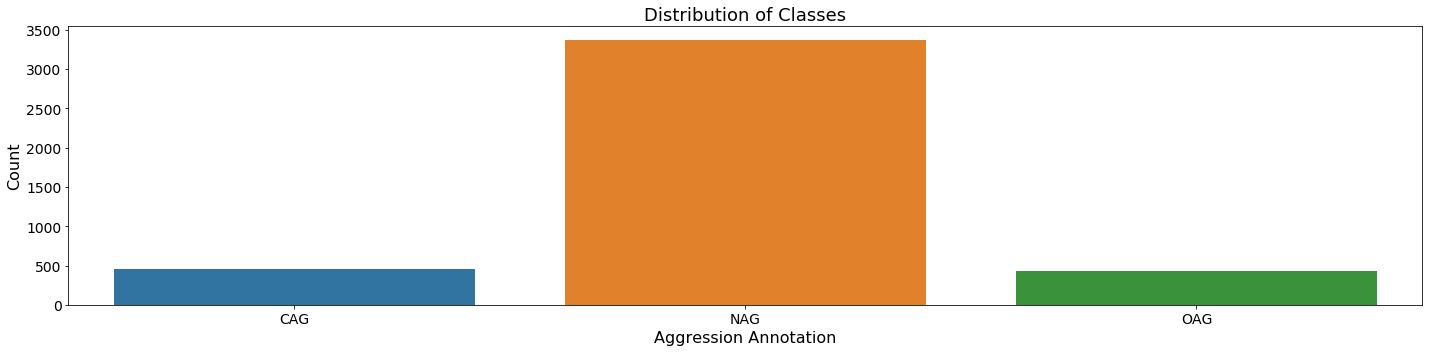

In [32]:
def barplot(df, x, y, title, label, ylabel, dim, orient = "v", ci = False, hue = None):
    
    plt.figure(figsize = dim, facecolor = "white")
    sns.barplot(x = x, y = y, data = df, orient = orient, ci = ci, hue = hue)
    plt.title(f"{title}", size = 18)
    plt.xlabel(f"{label}", size = 16)
    plt.ylabel(f"{ylabel}", size = 16)
    plt.xticks(size = 14)
    plt.yticks(size = 14)
    plt.tight_layout();
    

df = (eng_train.set_index(['ID', 'Sub-task A']).count(level='Sub-task A'))

barplot(df = df,
        x = df.index,
        y = "Text",
        title = "Distribution of Classes",
        label = "Aggression Annotation",
        ylabel = "Count",
        dim = (20,5))

eng_train['Sub-task A'].value_counts()